In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open(r'mixing_modles_dict_numpy_17k_parts.txt', 'rb') as f:
    mixing_models_dict = pickle.load(f)

In [3]:
for key, value in mixing_models_dict.items():
    print(key, value)
print(len(mixing_models_dict))

average_height [[-0.06173706  0.06173706]
 [-0.0604248   0.06039429]
 [-0.06008911  0.06011963]
 ...
 [-0.05267334  0.05310059]
 [-0.05163574  0.05209351]
 [-0.05081177  0.05130005]]
lacey_index [[0.11164458 0.11888349]
 [0.13479342 0.12276492]
 [0.11062381 0.11158508]
 ...
 [0.57070964 0.56536292]
 [0.54891726 0.54724425]
 [0.58120588 0.59237436]]
mixing_entropy [3.88790875e-06 1.04493469e-05 1.58337749e-05 ... 1.70292696e-04
 1.31039326e-04 1.30731303e-04]
coordination_number_index [0.00147365 0.0234248  0.02509368 ... 0.50328781 0.50314088 0.50212697]
4


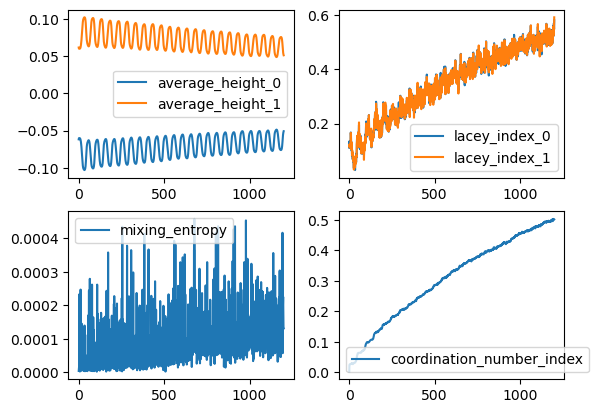

In [4]:
fig1, axs1 = plt.subplots(2,2)
flat_plot_id = 0
for key, value in mixing_models_dict.items():
    if isinstance(value, list) and len(value==0):
        continue
    if isinstance(value, np.ndarray) and value.ndim==1:
        cur_plot = axs1.reshape(-1)[flat_plot_id]
        cur_plot.plot(value, label=key)
        cur_plot.legend()
        flat_plot_id += 1
    elif isinstance(value, np.ndarray) and value.ndim>1:
        cur_plot = axs1.reshape(-1)[flat_plot_id]
        for i in range(value.ndim):
            cur_plot.plot(value[:,i], label=key+f'_{i}')
        cur_plot.legend()
        flat_plot_id += 1
fig1.savefig('comparison_mixing_models.svg',transparent=False)
        

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
50


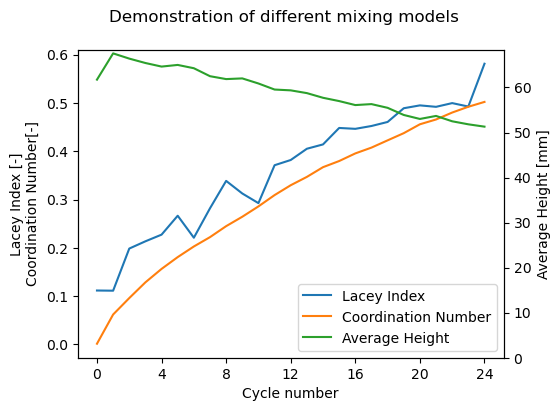

In [54]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(colors)

fig2, ax2_0 = plt.subplots(figsize=(5.5,4))
n = 24
timesteps = mixing_models_dict['lacey_index'].shape[0]
n_th = int(timesteps/n)
print(n_th)
lns1 = ax2_0.plot(mixing_models_dict['lacey_index'][:,0][::n_th], label='Lacey Index')
ax2_0.set_ylabel('Lacey Index [-]\nCoordination Number[-]')
#ax2_1 = ax2_0.twinx()
lns2 = ax2_0.plot(mixing_models_dict['coordination_number_index'][::n_th], label='Coordination Number')
ax2_2 = ax2_0.twinx()
lns3 = ax2_2.plot(1000*mixing_models_dict['average_height'][:,1][::n_th], label='Average Height', color=colors[2])
ax2_2.set_ylabel('Average Height [mm]')
ax2_2.set_ylim(bottom=0.0)

ax2_0.set_xlabel('Cycle number')
ax2_0.set_xticks(np.linspace(0,n,7))
ax2_0.set_xticklabels(np.linspace(0,n,7).astype(int))
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2_0.legend(lns, labs, loc='lower right')

fig2.suptitle('Demonstration of different mixing models')

fig2.savefig('comparison_mixing_models_nice.svg',transparent=False)
